<a href="https://colab.research.google.com/github/nigamdivyyanshi16/Exploratory-Data-Analysis-Python/blob/main/Uber_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uber Data Analysis

1. Importing libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

2.Loading Dataset

In [51]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA DATASETS/UberDataset.csv",encoding="unicode_escape")
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


3.Basic Data Inspection

In [52]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


Findings:
1)Columns:START_DATE and END_DATE have object datatype which should be converted to datetime for better analysis.
2)Column:PURPOSE have very high numbers of missing values

4. Data preprocessing

i)Substituting NA values

In [54]:
#As purpose column has categorical variable, which can be filled with mode, but it might not be the best approach to do.
df['PURPOSE'].fillna(df['PURPOSE'].mode()[0],inplace=True)

In [55]:
df.sample()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
870,10/28/2016 18:13,10/28/2016 20:07,Business,Winston Salem,Asheville,133.6,Meeting


ii)Change incorrect datatypes

In [56]:
df['START_DATE']=pd.to_datetime(df['START_DATE'],errors="coerce")
#errors="coerce": invalid non numeric data to nat(not a time)

In [57]:
df['END_DATE']=pd.to_datetime(df['END_DATE'],errors="coerce")

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [59]:
from datetime import datetime

df['date']=pd.DatetimeIndex(df['START_DATE']).date
#we created another 'Date' column
df['time']=pd.DatetimeIndex(df['START_DATE']).hour

In [60]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meeting,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


We want to create a column to categorize timing of ride as "Morning", "Afternoon", "Evening", "Night", wherein rides taken between 0-10=Morning, 10-15=Afternoon,5-19-"Evening",19-24=Night"

In [61]:
df['CATEGORY_RIDE_TIME']=pd.cut(x=df['time'],bins=[0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'])
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,CATEGORY_RIDE_TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meeting,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night


In [62]:
#alternate method for above cut() function
'''def categorize_time(hour):
    if 0 <= hour < 10:
        return 'Morning'
    elif 10 <= hour < 15:
        return 'Afternoon'
    elif 15 <= hour < 19:
        return 'Evening'
    else:
        return 'Night'

df['CATEGORY_RIDE_TIME'] = df['time'].apply(categorize_time)
'''

"def categorize_time(hour):\n    if 0 <= hour < 10:\n        return 'Morning'\n    elif 10 <= hour < 15:\n        return 'Afternoon'\n    elif 15 <= hour < 19:\n        return 'Evening'\n    else:\n        return 'Night'\n\ndf['CATEGORY_RIDE_TIME'] = df['time'].apply(categorize_time)\n"

pd.cut():
When we need to convert continuous numerical data into categorized groups.

When we already know the bin edges (ranges).

When working with numerical data like time, age, salary, temperature, etc.

iii. Handling missing values

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   START_DATE          421 non-null    datetime64[ns]
 1   END_DATE            420 non-null    datetime64[ns]
 2   CATEGORY            1155 non-null   object        
 3   START               1155 non-null   object        
 4   STOP                1155 non-null   object        
 5   MILES               1156 non-null   float64       
 6   PURPOSE             1156 non-null   object        
 7   date                421 non-null    object        
 8   time                421 non-null    float64       
 9   CATEGORY_RIDE_TIME  414 non-null    category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 82.7+ KB


In [64]:
# Calculate missing value percentage
missing_percentage_sd= (df['START_DATE'].isnull().sum() / len(df)) * 100
missing_percentage_ed = (df['START_DATE'].isnull().sum() / len(df)) * 100

print(f"Missing Percentage: {missing_percentage_sd:.2f}%")
print(f"Missing Percentage:{missing_percentage_ed:.2f}%")

Missing Percentage: 63.58%
Missing Percentage:63.58%


As missing values are more than 25% hence, dropping missing values columns instead of imputating them.

In [65]:
df.dropna(inplace=True)

In [66]:
df.shape

(413, 10)

In [67]:
df.duplicated().sum()
#no duplicate values

np.int64(0)

5. Data Analysis and Visualization

1. In which category do people book the most Uber rides?

In [68]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'date', 'time', 'CATEGORY_RIDE_TIME'],
      dtype='object')

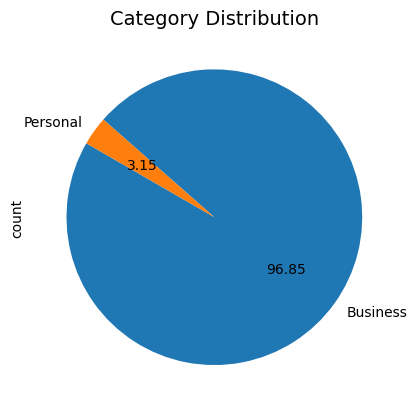

In [69]:
df['CATEGORY'].value_counts().plot(kind="pie",autopct="%.2f",startangle=150,  # Rotate for better alignment
)
plt.title("Category Distribution", fontsize=14)
plt.show()

2. For which purposes do people book Uber the most?

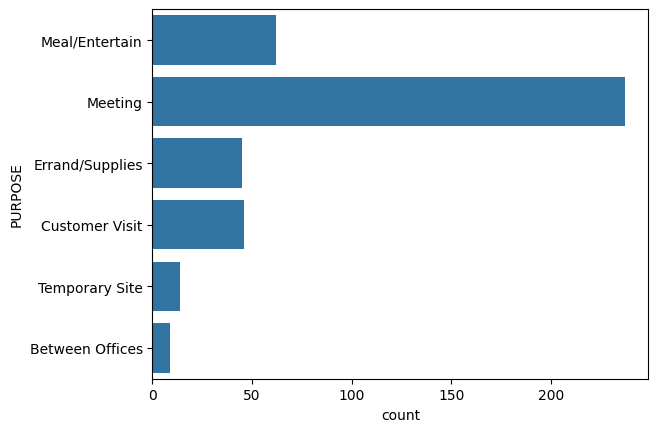

In [70]:
sns.countplot(df['PURPOSE'])
plt.show()

People mostly use Uber for "Meeting" Purposes.

3. At what time do people book cabs the most from Uber?

<Axes: xlabel='count', ylabel='CATEGORY_RIDE_TIME'>

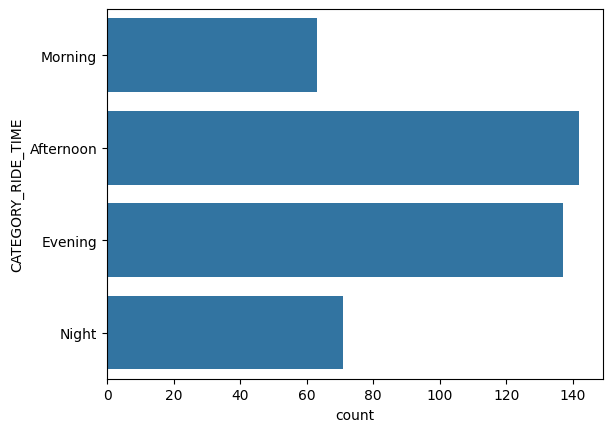

In [71]:
sns.countplot(df['CATEGORY_RIDE_TIME'])

People use Uber mostly in Afternoons and Evening.
People use it least in Mornings

4. In which months do people book Uber rides less frequently

In [77]:
# Extract Month and Weekday using strftime
df['Month'] = df['START_DATE'].dt.strftime('%B')   # Full month name (e.g., January)
df['Weekday'] = df['START_DATE'].dt.strftime('%A') # Full weekday name (e.g., Monday)
df.tail(3)


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,CATEGORY_RIDE_TIME,Month,Weekday
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,Afternoon,December,Monday
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,Evening,December,Monday
1047,2016-12-12 20:48:00,2016-12-12 20:57:00,Business,Morrisville,Cary,3.0,Customer Visit,2016-12-12,20.0,Night,December,Monday


In [81]:
# Count rides per month
monthly_counts = df['Month'].value_counts().sort_values()

# Display counts
print(monthly_counts)

Month
September    13
January      23
October      24
April        24
May          26
July         34
December     39
February     40
June         42
March        42
August       43
November     63
Name: count, dtype: int64


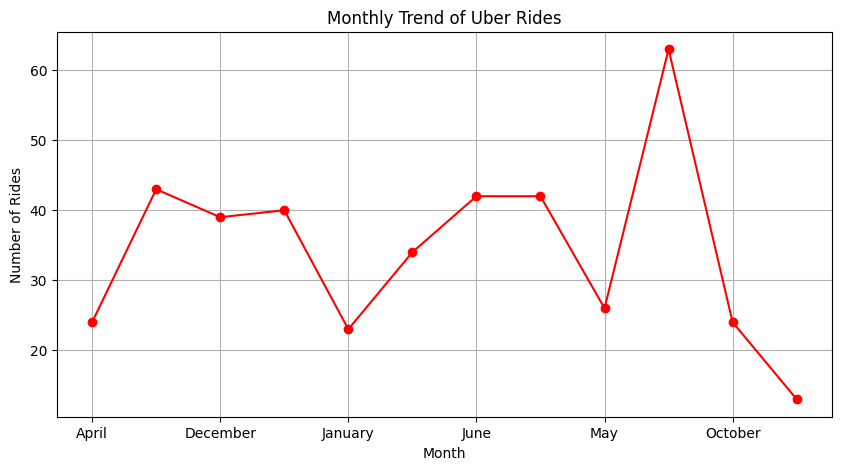

In [82]:
plt.figure(figsize=(10,5))
monthly_counts.sort_index().plot(kind='line', marker='o', linestyle='-', color='red')

plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.title("Monthly Trend of Uber Rides")
plt.grid(True)

plt.show()

In [83]:
least_booked_month = monthly_counts.idxmin()
least_rides = monthly_counts.min()

print(f"The month with the least Uber rides is {least_booked_month} with {least_rides} rides.")


The month with the least Uber rides is September with 13 rides.


5. On which days of the week do people book Uber rides the most?

In [86]:
weekly_counts=df['Weekday'].value_counts().sort_values(ascending=False)
weekly_counts

,count
Weekday,
Friday,86
Monday,61
Thursday,61
Tuesday,58
Saturday,52
Wednesday,48
Sunday,47


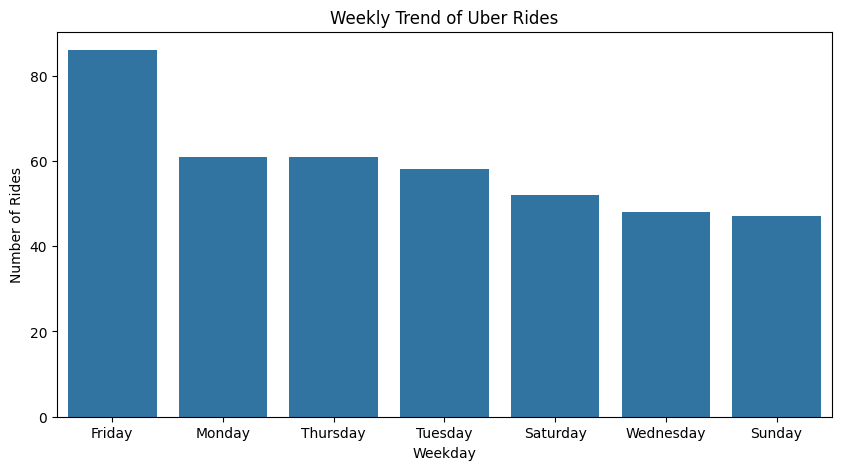

In [88]:
plt.figure(figsize=(10,5))
sns.barplot(x=weekly_counts.index,y=weekly_counts.values)
plt.xlabel("Weekday")
plt.ylabel("Number of Rides")
plt.title("Weekly Trend of Uber Rides")
plt.show()

In [91]:
weekday_name=weekly_counts.idxmax()
weekday_count=weekly_counts.max()
print(f"The day with the most Uber rides is {weekday_name} with {weekday_count} rides.")

The day with the most Uber rides is Friday with 86 rides.


6. How many miles do people usually book a cab for through Uber?

In [99]:
df['MILES'].value_counts().sort_values(ascending=False)

,count
MILES,
9.9,16
3.1,9
2.8,9
3.0,9
1.8,9
...,...
12.2,1
45.9,1
12.6,1


<Axes: ylabel='MILES'>

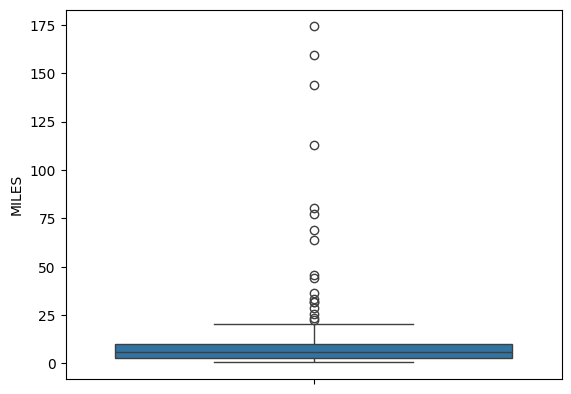

In [92]:
#to check outliers
sns.boxplot(df['MILES'])

In [100]:
#Find the most common ride distance
most_common_distance = df['MILES'].mode()[0]
print(f"Most common ride distance: {most_common_distance:.2f} miles")

Most common ride distance: 9.90 miles


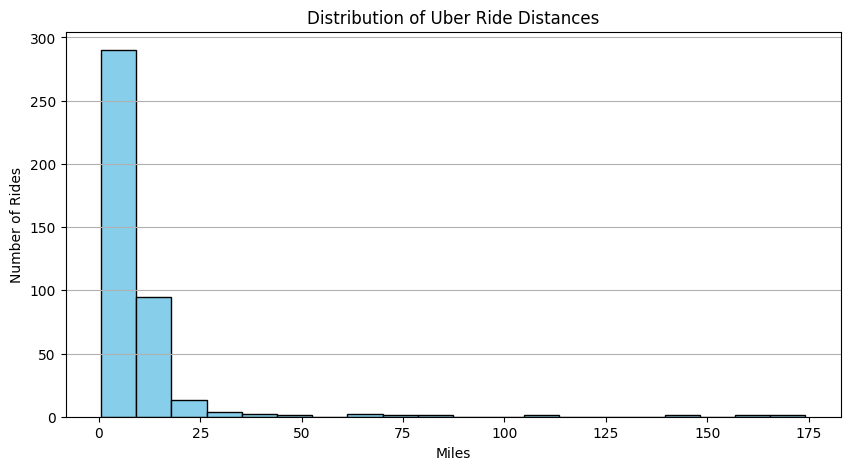

In [101]:
plt.figure(figsize=(10,5))
plt.hist(df['MILES'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel("Miles")
plt.ylabel("Number of Rides")
plt.title("Distribution of Uber Ride Distances")
plt.grid(axis='y')

plt.show()

<Axes: ylabel='MILES'>

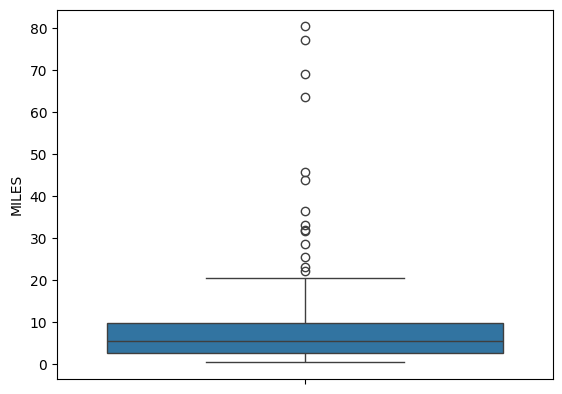

In [93]:
sns.boxplot(df[df['MILES']<100]['MILES'])

We can see people are mostly using Uber rides between 20 to 40 miles distance.

<Axes: ylabel='MILES'>

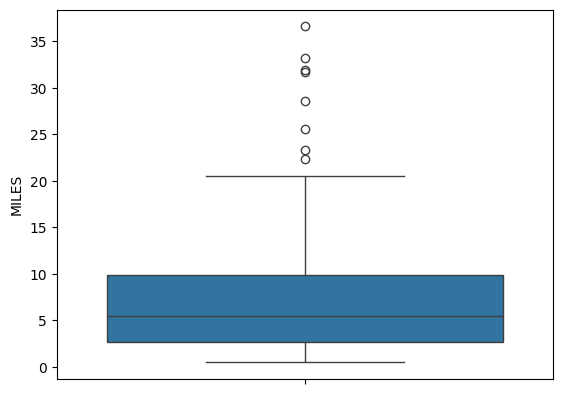

In [95]:
sns.boxplot(df[df['MILES']<40]['MILES'])

People mostly use for 0 to 10 miles.

<Axes: xlabel='MILES', ylabel='Density'>

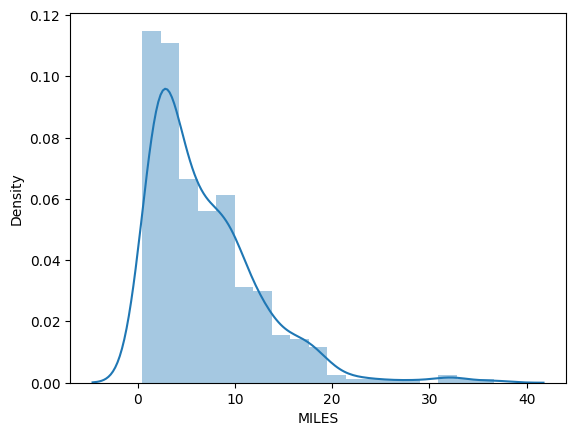

In [97]:
sns.distplot(df[df['MILES']<40]['MILES'])

People are using Uber for their ride distance mostly between 0 to 15 mile. or more 20 mile.
also, by above finding we also know, that Uber is used by people for Meeting purposes.

7. Relationship between Month and Category i.e How do Uber ride bookings vary by month and ride category?


CATEGORY  Business  Personal
Month                       
April         21.0       3.0
August        43.0       0.0
December      39.0       0.0
February      36.0       4.0
January       23.0       0.0


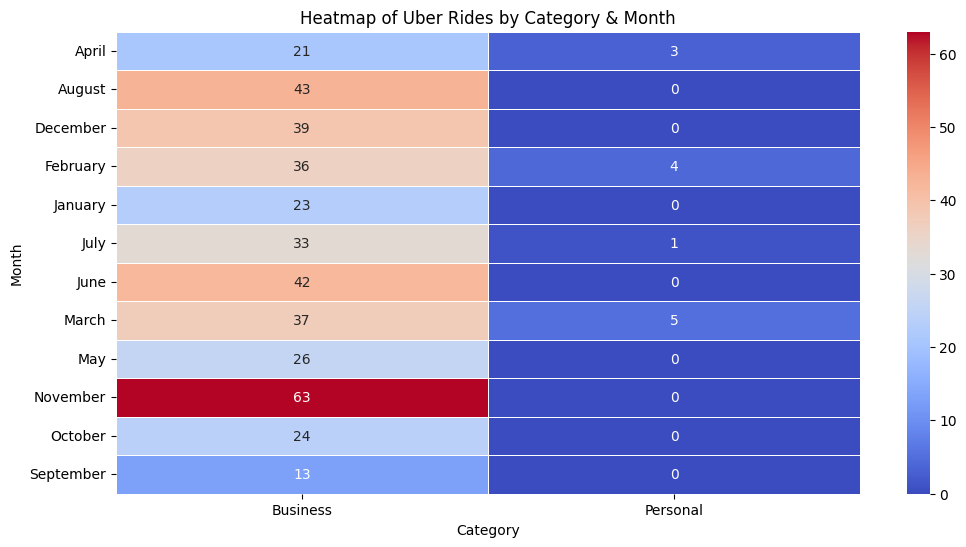

In [104]:
# Count the number of rides in each Category per Month
monthly_category_counts = df.groupby(['Month', 'CATEGORY']).size().reset_index(name='Ride Count')

# Pivot Table for better structure
pivot_data = monthly_category_counts.pivot(index='Month', columns='CATEGORY', values='Ride Count').fillna(0)
#If some months don’t have rides in certain categories, it fills those missing values with 0 instead of leaving them empty.
# Display first few rows
print(pivot_data.head())

plt.figure(figsize=(12,6))
sns.heatmap(pivot_data, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
#annot=True → This tells Seaborn to display values inside the heatmap cells.

plt.xlabel("Category")
plt.ylabel("Month")
plt.title("Heatmap of Uber Rides by Category & Month")

plt.show()


Darker colors show high bookings, lighter colors show low bookings.
November month has most number of Business rides taking place.